# AS01 - Measurement Uncertainty

In [9]:
import numpy as np
import matplotlib.pyplot as plt

## 2) Air Density from Measurements

In [10]:
# Wind Speed
v=8 #m/s
k = 2
Upv = 0.04
URv = 0.04/2 #m/s
Uv = v*Upv/k

#Temperature
T = 20+273.17 #K
UT = (0.5/np.sqrt(3))

#Prerssure
Pa = 98000 #Pa
UPa = 500 #Pa

#Turbine
cp = 0.45
A = 2124 #m2
R = 287.05 #J/(kgK)

In [11]:
UP_rel = np.sqrt((((3*Uv/v)**2)+((UPa/Pa)**2)+((-UT/T)**2)))
print(UP_rel)

0.06022458295145028


In [12]:
UP_abs = np.sqrt((((3*Uv/v)**2)+((UPa/Pa)**2)+((-UT/T)**2))*(0.5*Pa/(R*T)*A*cp*(v**3))**2)
print(UP_abs)

17160.49417621439


## 3) Monte Carlo

### a) Power function

In [13]:
def power(vp, Tp, Pap):

    P = 0.5*(Pap/(R*Tp))*A*cp*vp**3

    return P

In [14]:
P_or = power(v, T, Pa)
print(P_or)

284941.6855248002


### b) Populations

In [15]:
np.random.seed(42)
n_samples = 10000

# V: Gaussian Distribution
V_mean = v
V_uncertainty = Uv
V_population = np.random.normal(loc=V_mean, scale=V_uncertainty, size=n_samples)

# T: Uniform Distribution
T_mean = T
T_uncertainty = UT
T_low = T_mean - T_uncertainty
T_high = T_mean + T_uncertainty
T_population = np.random.uniform(low=T_low, high=T_high, size=n_samples)

# pa: Gaussian Distribution
pa_mean = Pa
pa_uncertainty = UPa
pa_population = np.random.normal(loc=pa_mean, scale=pa_uncertainty, size=n_samples)


### c) Power population

In [16]:
P_population = power(V_population, T_population, pa_population)

In [17]:
P_population

array([292903.49517392, 281322.09080517, 297168.07334727, ...,
       272407.15209163, 294113.91621155, 298266.28834153])

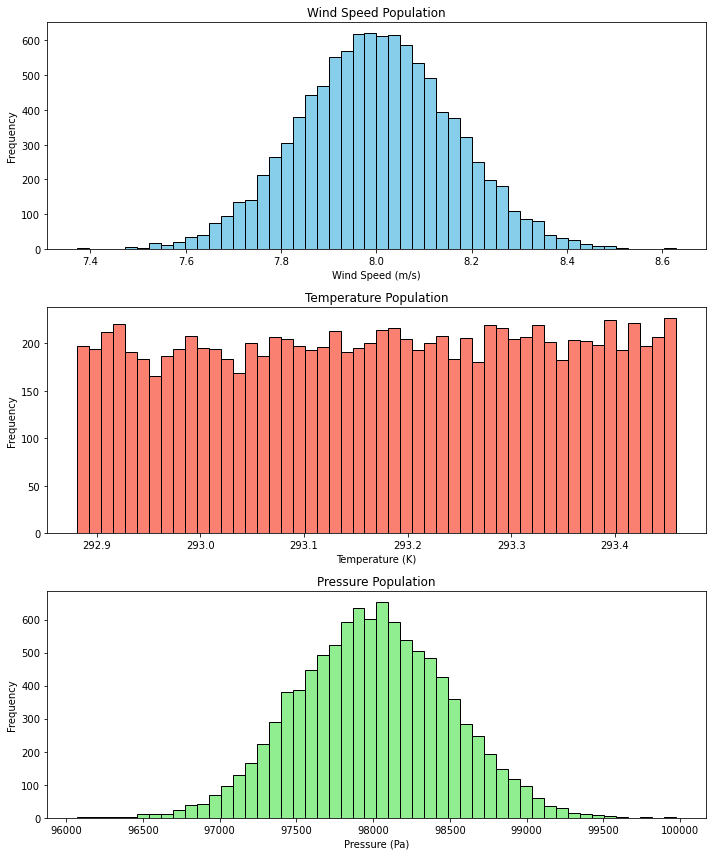

In [18]:
fig, axs = plt.subplots(3, 1, figsize=(10, 12))

# Wind Speed Plot
axs[0].hist(V_population, bins=50, color='skyblue', edgecolor='black')
axs[0].set_title('Wind Speed Population')
axs[0].set_xlabel('Wind Speed (m/s)')
axs[0].set_ylabel('Frequency')

# Temperature Plot
axs[1].hist(T_population, bins=50, color='salmon', edgecolor='black')
axs[1].set_title('Temperature Population')
axs[1].set_xlabel('Temperature (K)')
axs[1].set_ylabel('Frequency')

# Pressure Plot
axs[2].hist(pa_population, bins=50, color='lightgreen', edgecolor='black')
axs[2].set_title('Pressure Population')
axs[2].set_xlabel('Pressure (Pa)')
axs[2].set_ylabel('Frequency')

# Layout adjustment
plt.tight_layout()
plt.show()

### d) Best estimate, standard uncertaity and larger population for power

In [19]:
P_mean = np.mean(P_population)
P_std_uncertainty = np.std(P_population, ddof=1)

In [20]:
P_mean

285240.2853765573

In [21]:
P_std_uncertainty

17246.013891579834

Sample Size: 10000
P_mean: 285240.285 W
P_std_uncertainty: 17246.014 W

Sample Size: 20000
P_mean: 285201.440 W
P_std_uncertainty: 17171.411 W

Sample Size: 30000
P_mean: 285351.347 W
P_std_uncertainty: 17106.802 W

Sample Size: 40000
P_mean: 285223.423 W
P_std_uncertainty: 17189.387 W

Sample Size: 50000
P_mean: 285217.551 W
P_std_uncertainty: 17192.745 W

Sample Size: 60000
P_mean: 285162.805 W
P_std_uncertainty: 17182.996 W

Sample Size: 70000
P_mean: 285301.894 W
P_std_uncertainty: 17158.632 W

Sample Size: 80000
P_mean: 285215.948 W
P_std_uncertainty: 17173.049 W

Sample Size: 90000
P_mean: 285310.448 W
P_std_uncertainty: 17247.694 W

Sample Size: 100000
P_mean: 285171.970 W
P_std_uncertainty: 17169.650 W



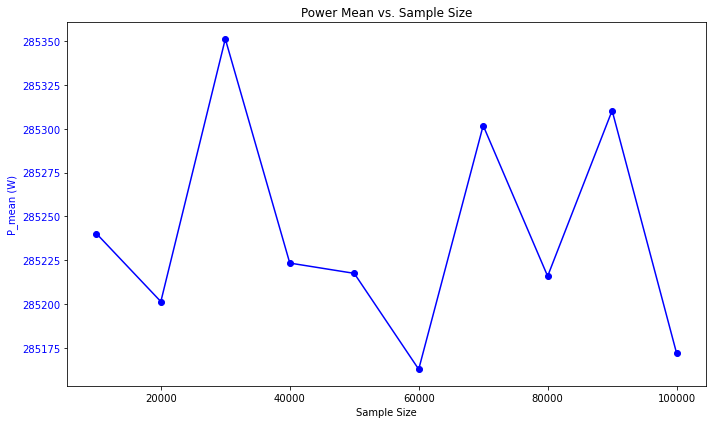

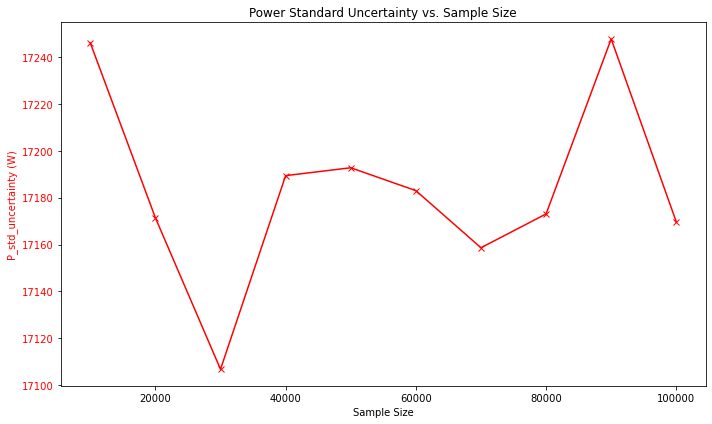

In [24]:
np.random.seed(42)
sample_sizes = [10000, 20000, 30000, 40000, 50000, 60000, 70000, 80000, 90000, 100000]

P_means = []
P_std_uncertainties = []

for n_samples in sample_sizes:
    # Wind Speed: Gaussian Distribution
    V_mean = v
    V_uncertainty = Uv
    V_population = np.random.normal(loc=V_mean, scale=V_uncertainty, size=n_samples)

    # Temperature: Uniform Distribution
    T_mean = T
    T_uncertainty = UT
    T_low = T_mean - T_uncertainty
    T_high = T_mean + T_uncertainty
    T_population = np.random.uniform(low=T_low, high=T_high, size=n_samples)

    # Pressure: Gaussian Distribution
    pa_mean = Pa
    pa_uncertainty = UPa
    pa_population = np.random.normal(loc=pa_mean, scale=pa_uncertainty, size=n_samples)

    # Power Population
    P_population = power(V_population, T_population, pa_population)

    # Calculate mean and standard uncertainty
    P_mean = np.mean(P_population)
    P_std_uncertainty = np.std(P_population, ddof=1)

    P_means.append(P_mean)
    P_std_uncertainties.append(P_std_uncertainty)

    print(f"Sample Size: {n_samples}")
    print(f"P_mean: {P_mean:.3f} W")
    print(f"P_std_uncertainty: {P_std_uncertainty:.3f} W\n")

# Plotting the results for P_mean
fig, ax1 = plt.subplots(figsize=(10, 6))

ax1.plot(sample_sizes, P_means, label='P_mean', color='b', marker='o')
ax1.set_title('Power Mean vs. Sample Size')
ax1.set_xlabel('Sample Size')
ax1.set_ylabel('P_mean (W)', color='b')
ax1.tick_params(axis='y', labelcolor='b')

plt.tight_layout()
plt.show()

# Plotting the results for P_std_uncertainty
fig, ax2 = plt.subplots(figsize=(10, 6))

ax2.plot(sample_sizes, P_std_uncertainties, label='P_std_uncertainty', color='r', marker='x')
ax2.set_title('Power Standard Uncertainty vs. Sample Size')
ax2.set_xlabel('Sample Size')
ax2.set_ylabel('P_std_uncertainty (W)', color='r')
ax2.tick_params(axis='y', labelcolor='r')

plt.tight_layout()
plt.show()